# <font color='blue'>How the <font color='gold'>Golden State Warriors</font> won the 2015 NBA Finals</font>

### By Jonathan Ngo and Soloman Wong

This markdown file can be found at https://github.com/jdngo/sta141bfinal

# I. Objective

The goal of our project was to determine how the Golden State Warriors (GSW) won the 2015 NBA Finals. This topic is of particular interest to us not only because we're big Warriors fans, but also because the last time the Warriors won the NBA championship was 40 years ago in 1975! On top of that, they were able to beat the Cleveland Cavaliers and Lebron James, who is considered to be one of the best basketball players currently in the NBA.

For this project, we investigated the Warriors playoffs run to try to understand the different factors that might explain why they were so successful.

# II. Data Description

In [1]:
import pandas as pd

<strong>1. Data:</strong> NBA Win Probabilities

<strong>Type:</strong> TSV file

<strong>Source:</strong> https://github.com/fivethirtyeight/data/tree/master/nba-winprobs

<strong>Description:</strong> This data contains the win probabilities for each nba team over the course of each minute of the game during the regular season. The regular season consists of the 82 games played before the NBA playoffs and finals.

In [2]:
win = pd.read_table('nba.tsv')
win.head()

,team,0,1,2,3,4,5,6,7,8,...,39,40,41,42,43,44,45,46,47,48
0,Hawks,0.50659,0.51033,0.51500,0.51631,0.51853,0.52819,0.53316,0.52887,0.53559,...,0.71627,0.73074,0.74168,0.76403,0.78034,0.78955,0.79571,0.81632,0.83095,0.80556
1,Nets,0.50290,0.50561,0.50916,0.51488,0.51580,0.51226,0.52629,0.51997,0.52036,...,0.40743,0.41453,0.42484,0.42403,0.44106,0.43498,0.40266,0.39979,0.41820,0.42308
2,Celtics,0.50072,0.50446,0.49667,0.49552,0.49248,0.49178,0.48757,0.48156,0.46489,...,0.41242,0.40990,0.39759,0.41533,0.42298,0.41764,0.43214,0.39493,0.39146,0.41176
3,Hornets,0.49680,0.49290,0.49334,0.48998,0.48366,0.48375,0.48789,0.48325,0.47458,...,0.46885,0.46520,0.46380,0.44927,0.45589,0.44461,0.44333,0.42749,0.40301,0.40196
4,Bulls,0.49521,0.49411,0.49999,0.49727,0.48183,0.47770,0.47760,0.48167,0.48419,...,0.53731,0.54208,0.55070,0.55343,0.53974,0.54905,0.55394,0.58889,0.62055,0.63889


<strong>2. Data</strong>: NBA Player Projections

<strong>Type:</strong>: CSV file

<strong>Source:</strong> https://github.com/fivethirtyeight/data/tree/master/nba-draft-2015

<strong>Description:</strong> This data contains the draft projections for NBA players from 2001 to 2015. These draft projections are based on NBA scouts that predict how likely it is that a player will become a superstar or a bust.

In [3]:
proj = pd.read_csv("historical_projections.csv")
proj.head()

,Player,Position,ID,Draft Year,Projected SPM,Superstar,Starter,Role Player,Bust
0,Karl-Anthony Towns,C,karl-anthony-towns,2015,1.030606,0.134767,0.427183,0.163083,0.274967
1,Justise Winslow,SF,justise-winslow,2015,0.875329,0.083529,0.510905,0.176767,0.228800
2,Stanley Johnson,SF,stanley-johnson,2015,0.679493,0.067800,0.423733,0.278500,0.229967
3,Jahlil Okafor,C,jahlil-okafor,2015,0.521661,0.058717,0.409900,0.235533,0.295850
4,D`Angelo Russell,PG,d-angelo-russell,2015,0.511967,0.152033,0.342283,0.096583,0.409100


<strong>3. Data</strong>: NBA Player Statistics and Point Differentials

<strong>Type</strong>: CSV file

<strong>Source:</strong> http://www.basketball-reference.com

<strong>Description:</strong> This data contains different statistics for each NBA player on the Golden State Warriors and the Cleveland Cavaliers during the 2014-2015 NBA regular season as well as the 2015 NBA finals. We also obtained the point differentials for each playoff game from this site. The NBA playoffs occur after the NBA finals and consist of 3 elimination rounds and then a finals round to determine the NBA champion. Teams win a playoff round if they win 4/7 games.

Note: This data is imported in it's corresponding sections.

# III. An Overview of the Playoffs

This section looks at an overview of the three playoff games before the NBA finals. The plots below show the probability of a team winning a regular season game over the course of each of the 48 minutes of an NBA game, divided by each of the 4 quarters in an NBA game. 

This data is based on a logistic regression using the game time, point differential, current possession, and Vegas point spread. It is important to note that these win probabilities reflect what already happened during the regular season, not during the playoffs. These probabilities do show, however, which teams are generally stronger. During the playoffs, teams tend to play their best players for more minutes than their bench players. Thus, these probabilities are likely higher if calculated for the playoffs when better players are seeing more game time and the pressure to win is much greater.

In [4]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [5]:
minute = range(0,49)
win_gsw = [win.iloc[9,i] for i in range(1,50)]
win_nop = [win.iloc[18,i] for i in range(1,50)]
win_mem = [win.iloc[14,i] for i in range(1,50)]
win_hou = [win.iloc[10,i] for i in range(1,50)]
win_cavs = [win.iloc[5,i] for i in range(1,50)]

pwin = pd.DataFrame({
        "minute": minute,
        "gsw": win_gsw,
        "nop": win_nop,
        "mem": win_mem,
        "hou": win_hou,
        "cavs": win_cavs
    })

In [6]:
def plot_pwin(opp, stage, col):
    """
    This function plot the probability of winning for each opponent
    the GSW faced in the playoffs.
    opp: Opponent code (string)
    stage: Round in the playoffs (string)
    col: Opponent color (string)
    """
    plt.plot(pwin['minute'], pwin['gsw'], color='gold')
    plt.plot(pwin['minute'], pwin[opp], color=col)
    plt.axvline(x=12, color='black', ls='--')
    plt.axvline(x=24, color='black', ls='--')
    plt.axvline(x=36, color='black', ls='--')
    axes = plt.gca()
    axes.set_xlim([0,48])
    plt.title("%s: Probability of winning" % stage)
    plt.xlabel("Minute")
    plt.ylabel('Probability')
    plt.legend(loc = 'upper left')

## First Round: <font color='gold'>Warriors</font> vs <font color='blue'>New Orleans Pelicans</font>

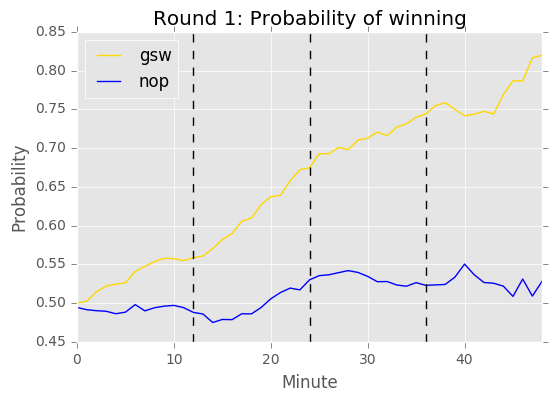

In [7]:
plot_pwin('nop','Round 1','blue')

This plot shows that the Pelicans were a very weak opponent who probably did not have the endurance or star power to keep up with the Warriors throughout any of the four quarters. This is not surprising considering the Warriors were the 1st seed and the Pelicans were the 8th seed when the playoffs began.

## Conference Semifinals: <font color='gold'>Warriors</font> vs <font color='teal'>Memphis Grizzlies</font>

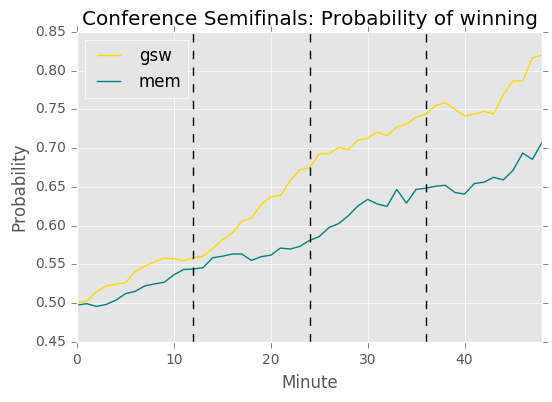

In [8]:
plot_pwin('mem','Conference Semifinals','teal')

This plot shows that the Grizzlies were a much tougher opponent for the Warriors than the Pelicans. Although the Grizzlies are able to keep a close game through the 1st quarter and into the beginning of the 2nd quarter, they just aren't able to keep up with the dominance of the Warriors throughout the entire game.

## Conference Finals: <font color='gold'>Warriors</font> vs <font color='red'>Houston Rockets</font>

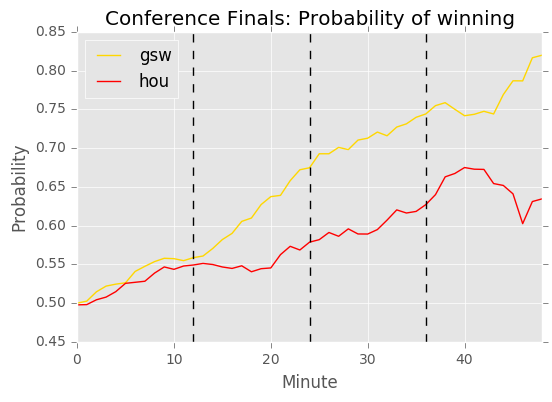

In [9]:
plot_pwin('hou','Conference Finals','red')

Similar the the Grizzlies, the Rockets are able to keep the game very close during the first quarter, but trailed the Warriors for most of the game throughout the 2nd and 3rd quarter. In the 4th quarter, the Rockets are able to being the game a little closer, however, they're unable to finish the game strong and win.

These graphs show that the 2014-2015 Warriors team was absolutely dominatng. They were able to build very strong leads during the first half of the game that made it difficult for other teams to overcome. They also had the endurance and depth in terms of personnel and skill to maintain these leads throughout the game.

## Point Differentials Throughout the Playoffs

In this section we looked at the average point differentials between the Warriors and each of their oponents according to the location the games were played in (home vs away). The larger the dot on the plot, the greater the point differential. The point differential refers to the different between the final score of a game for each team. Below you can see dots for each playoffs opponent: Blue - New Orleans Pelicans, Teal - Memphis Grizzlies, Red - Houston Rockets, Maroon - Cavaliers. The yellow dot represents the point differential for games played at the Warriors home court in Oakland, CA.

In [10]:
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import math
from geopy.geocoders import Nominatim

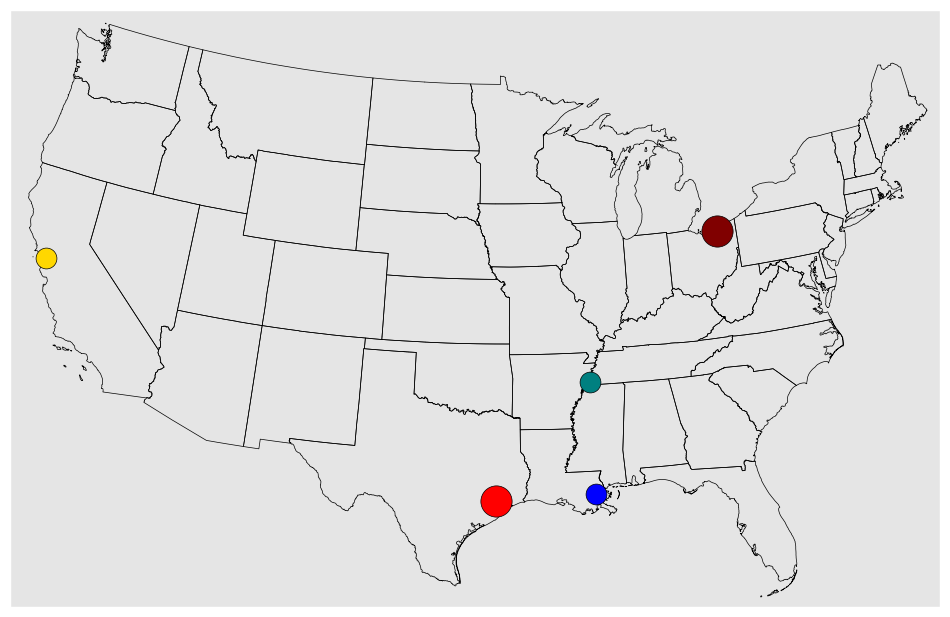

In [11]:
plt.figure(figsize=(12,12))

cities = [["New Orleans",7.5,'blue'],
          ['Houston', 14,'red'],
          ["Memphis",6.6,'teal'],
          ['Cleveland', 11.3,'maroon'],
          ['Oakland', 6,'gold']]

map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
              projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
map.readshapefile("st99_d00", name='states', drawbounds=True)

geolocator = Nominatim()
for (city,count,col) in cities:
    loc = geolocator.geocode(city)
    x, y = map(loc.longitude, loc.latitude)
    map.plot(x,y,marker='o',color=col,markersize=int(math.sqrt(count))*7.5)

plt.show()

Teams generally play better at home due to home court advantage. The plot above is surprising since the point differential at the Warriors home games in Oakland is not too large and roughly the same as the average point differential in New Orleans. The point differential in Houston and Cleveland is much larger, however. This is consistent with the fact that the Warriors are very capable of building and maintaining large leads against other teams.

It is important to note that the sample size is very small so the findings, especially for the Warriors home court, may be different for a larger sample size of playoff games.

# IV. The 2015 NBA Finals

In this section, our goal was to explain why the Warriors won the NBA Finals over the Cavaliers as well as look into other interesting data between the two teams.

## 1. Comparing the Big 3: <font color='gold'>Curry, Thompson, Green</font> vs <font color='maroon'>James, Irving, Love</font>

The Warriors and the Cavaliers both have a group of 3 players known in the NBA as the "Big 3". These players are the star players on their teams and generally have the greatest impact on  their team.

<strong>Warriors Big 3</strong>
<li>Stephen Curry</li>
<li>Klay Thompson</li>
<li>Draymond Green</li>

<strong>Cavaliers Big 3</strong>
<li>Lebron James</li>
<li>Kyrie Irving</li>
<li>Kevin Love</li>

This section looks at how NBA scouts viewed each team's Big 3 when they were drafted. The data used in this section comes from an NBA draft projection model containing the probability NBA scouts thought each player would become a superstar, a starting player, a role player, or a bust. Clearly there is no guarantee that the projections are correct, but they are still good indications of how skilled these players were thought to be before they came into the NBA.

In [12]:
import numpy as np

In [13]:
def superstar(data, team, col):
    """
    This function plots the probability that a player will become a
    superstar in the NBA for the big 3 players in the Cavaliers and
    the Warriors.
    team: team being plotted (string)
    col: color of team (string)
    """
    players = tuple(data['Player'].tolist())
    pos = np.arange(len(players))
    prob = data['Superstar'].tolist()
    plt.bar(pos, prob, align='center', color=col)
    plt.xticks(pos, players)
    axes = plt.gca()
    axes.set_ylim([0,0.25])
    plt.xlabel('Player')
    plt.ylabel('Probability')
    plt.title('Probability of being a superstar: %s' % team)
    plt.show()

In [14]:
gsw3 = proj[(proj['Player'] == 'Stephen Curry') |
             (proj['Player'] == 'Klay Thompson') |
             (proj['Player'] == 'Draymond Green')]

cavs3 = proj[(proj['Player'] == 'Lebron James') |
             (proj['Player'] == 'Kyrie Irving') |
             (proj['Player'] == 'Kevin Love')]

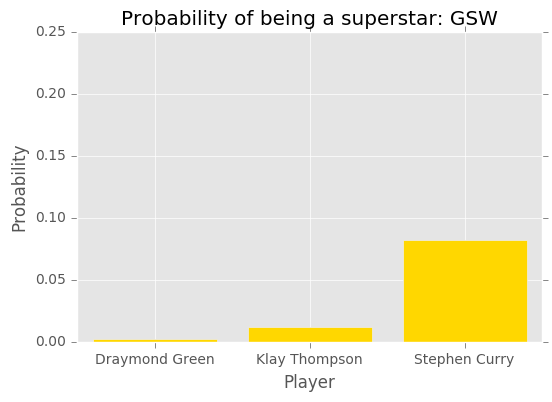

In [15]:
superstar(gsw3, 'GSW', 'gold')

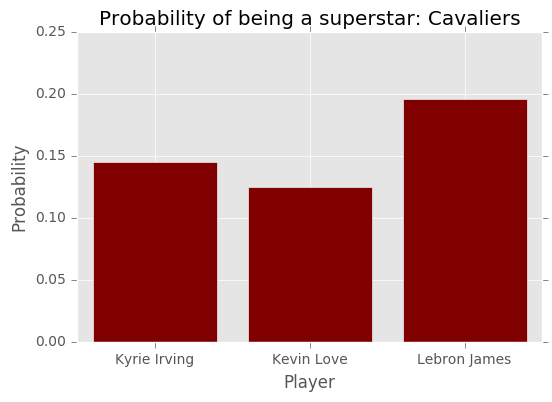

In [16]:
superstar(cavs3, 'Cavaliers', 'maroon')

These two plots are very interesting since it appears that NBA scouts thought the Cavaliers Big 3 were going to be superstars in the NBA by a much larger margin than the Warriors Big 3. This suggests that the James, Irving, and Love were much more skilled coming into the NBA than Curry, Thompson, and Green. Despite this, the Warriors beat the Cavaliers in the 2015 NBA finals. This suggests that the Warriors were able to better develop their draft picks. Other factors that might come into play include differences in talent once each player entered the NBA as while as better team chemistry between the Warriors Big 3 than the Cavaliers Big 3.

## 2. Probability of Winning: <font color='gold'>GSW</font> vs <font color='maroon'>Cleveland Cavaliers</font>

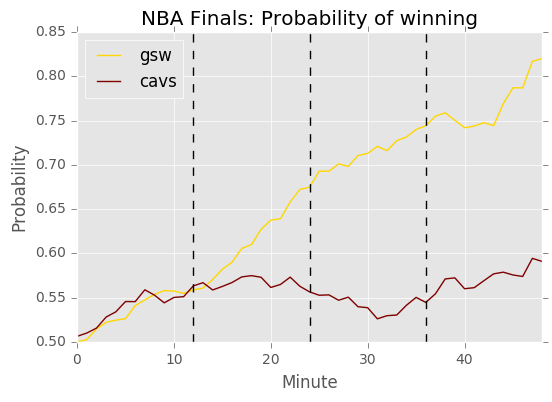

In [17]:
plot_pwin('cavs','NBA Finals','maroon')

This plot is very interesting since although the Cavaliers keep up the Warriors and even surpass them in some instances during the 1st and 2nd quarter, they don't seem to be able to keep up as the game progresses. 

This is suprising considering they have made it to the NBA finals multiple times. However, as discussed in the previous section, these win projections are based on regular season data, not playoffs data. The Cavaliers tend to dominate the Eastern Conference during the playoffs especially when their star players like Lebron James, Kyrie Irving, and Kevin Love get more game time. This suggests that the win probabilities for the Cavaliers might actually trend higher than the data suggests.

Regardless, it is clear that the Warriors do a good job of creating massive leads early on and maintaining those leads. This is one clear factor to their success in the playoffs and in the finals.

## 3. The Finals Matchup: <font color='gold'>GSW</font> vs <font color='maroon'>Cleveland Cavaliers</font>

### A. Obtaining Data on Player Statistics

In this section, we imported data on player statistics from the regular season and finals for each team. The finals data contains the statistics for the starting players. The starting players are generally the five best players on a team who start the basketball game. These statistics contain different measures of a player's performance. The data will be described as used, but more information on what the variables mean can be found on http://www.basketball-reference.com

In [18]:
def getStats(team, name):
    """
    This function retrieves data from the csv files containing
    player statistics for each team.
    team: team name (string)
    name: player name (string)
    """
    stats = pd.read_csv("./" + team + "/" + name + ".csv")
    stats = stats.loc[stats['Season'] == '2014-15']
    stats = stats.loc[stats['Tm'] == team]
    stats.insert(0, 'player', [name])
    return stats

## <font color='gold'>Warriors Player Statistics</font>

#### i. Regular Season Data

In [19]:
gsw_roster = ["Barbosa","Barnes","Bogut","Curry","Ezeli","Green",
              "Holiday","Iguodala","Kuzmic","Lee","Livingston",
              "McAdoo","Rush","Speights","Thompson"]
gsw_roster = [name.lower() for name in gsw_roster]
Rgsw = []
for name in gsw_roster:
    data = getStats("GSW", name)
    Rgsw.append(data)
Rgsw = pd.concat(Rgsw, axis=0)
Rgsw.head()

,player,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS\
13,barbosa,2014-15,32.0,GSW,NBA,SG,66,1,14.9,2.8,...,0.784,0.3,1,1.4,1.5,0.6,0.1,0.7,1.3,7.1\
2,barnes,2014-15,22.0,GSW,NBA,SF,82,82,28.3,3.9,...,0.72,1.4,4.1,5.5,1.4,0.7,0.2,0.9,1.8,10.1\
9,bogut,2014-15,30.0,GSW,NBA,C,67,65,23.6,3,...,0.524,2.1,6,8.1,2.7,0.6,1.7,1.6,2.8,6.3\
5,curry,2014-15,26.0,GSW,NBA,PG,80,80,32.7,8.2,...,0.914,0.7,3.6,4.3,7.7,2,0.2,3.1,2,23.8\
2,ezeli,2014-15,25.0,GSW,NBA,C,46,7,11,1.7,...,0.628,1.3,2.1,3.4,0.2,0.2,0.9,0.7,1.7,4.4\


#### ii. Finals Data for Starting Players

In [20]:
Fgsw = pd.read_csv('./FINALS/gsw.csv')
Fgsw = Fgsw.iloc[0:13,:]
Fgsw = Fgsw.iloc[0:5,:]
Fgsw.head()

,Rk,Player,Age,G,GS,MP,FG,FGA,3P,3PA,...,PTS,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,STL.1,BLK\
0,1.0,Stephen Curry\\curryst01,26.0,6,6.0,255,54,122,25,65,...,156,0.443,0.385,0.885,42.5,26.0,5.2,6.3,1.8,0.2\
1,2.0,Andre Iguodala\\iguodan01,31.0,6,3.0,222,37,71,14,35,...,98,0.521,0.400,0.357,37.1,16.3,5.8,4.0,1.3,0.3\
2,3.0,Klay Thompson\\thompkl01,24.0,6,6.0,227,36,88,12,40,...,95,0.409,0.300,0.917,37.9,15.8,4.3,1.7,0.5,1.0\
3,4.0,Draymond Green\\greendr01,24.0,6,6.0,222,24,63,5,19,...,78,0.381,0.263,0.735,37.0,13.0,8.3,5.0,2.2,1.2\
4,5.0,Harrison Barnes\\barneha02,22.0,6,6.0,198,19,51,8,19,...,53,0.373,0.421,0.778,32.9,8.8,5.8,0.8,0.8,0.5\


## <font color='maroon'>Cavaliers Player Statistics</font>

#### i. Regular Season Data

In [21]:
cavs_roster = ["Dellavedova","Harris","Haywood","Irving","James",
               "Jones","Love","Marion","Miller","Mozgov","Perkins",
               "Shumpert","Smith","Thompson","Varejao"]
cavs_roster = [name.lower() for name in cavs_roster]
Rcavs = []
for name in cavs_roster:
    data = getStats("CLE", name)
    Rcavs.append(data)
Rcavs = pd.concat(Rcavs, axis=0)
Rcavs.head()

,player,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,dellavedova,2014-15,24.0,CLE,NBA,SG,67,13,20.6,1.7,...,0.763,0.6,1.3,1.9,3,0.4,0,0.9,2.3,4.8
0,harris,2014-15,23.0,CLE,NBA,SG,51,1,9.7,0.9,...,0.6,0.1,0.7,0.8,0.5,0.1,0,0.5,1.2,2.7
15,haywood,2014-15,35.0,CLE,NBA,C,22,1,5.4,0.6,...,.538,0.3,1.0,1.3,0.1,0.1,0.5,0.5,0.8,1.6
3,irving,2014-15,22.0,CLE,NBA,PG,75,75,36.4,7.7,...,0.863,0.7,2.4,3.2,5.2,1.5,0.3,2.5,1.9,21.7
11,james,2014-15,30.0,CLE,NBA,SF,69,69,36.1,9,...,0.71,0.7,5.3,6,7.4,1.6,0.7,3.9,2,25.3


#### ii. Finals Data for Starting Players

In [22]:
Fcavs = pd.read_csv('./FINALS/cavs.csv')
Fcavs = Fcavs.iloc[0:11,:]
Fcavs = Fcavs.iloc[[0,1,3,4,5],:]
Fcavs.head()

,Rk,Player,Age,G,GS,MP,FG,FGA,3P,3PA,...,PTS,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,STL.1,BLK\
0,1.0,LeBron James\\jamesle01,30.0,6,6.0,274,78,196,13,42,...,215,0.398,0.310,0.687,45.7,35.8,13.3,8.8,1.3,0.5\
1,2.0,Timofey Mozgov\\mozgoti01,28.0,6,6.0,170,27,49,0,0,...,84,0.551,NaN,0.750,28.3,14.0,7.5,1.0,0.5,1.5\
3,4.0,Tristan Thompson\\thomptr01,23.0,6,6.0,247,24,48,0,0,...,60,0.500,NaN,0.600,41.1,10.0,13.0,0.3,0.7,1.0\
4,5.0,Matthew Dellavedova\\dellama01,24.0,6,5.0,191,15,53,6,26,...,45,0.283,0.231,0.818,31.8,7.5,2.7,2.7,1.2,0.0\
5,6.0,Iman Shumpert\\shumpim01,24.0,6,6.0,215,11,43,8,25,...,39,0.256,0.320,0.643,35.9,6.5,3.8,0.7,1.8,0.7\


### B. Analyzing Each Team's Performance (Regular Season vs Finals)

### Offensive/Defensive Efficiency: <font color='blue'>Assists vs Turnovers</font>

A player receives one <strong>assist</strong> when he passes the basketball to a teammate and that teammate makes a basket. A player commits a <strong>turnover</strong> when he has possession of the basketball, but loses the ball to a player on the opposing team. The assists to turnovers ratio shows how efficient a player is in terms of handling the basketball. Better players have more assists and fewer turnovers.

For the first plot, we looked at data from all the players during the regular season. For the second plot, we analyzed only the total finals performance of the five starting players for each team. These players are their respective team's most important and influential players who also play the most game minutes. Therefore, it is important to understand their impact on the game.

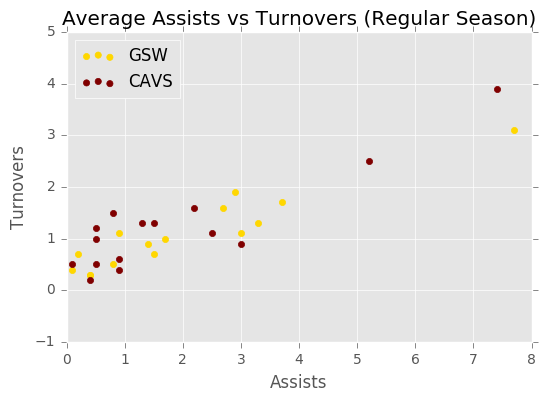

In [34]:
w = plt.scatter(Rgsw["AST"], Rgsw["TOV"], color='gold')
c = plt.scatter(Rcavs["AST"], Rcavs["TOV"], color='maroon')
axes = plt.gca()
axes.set_xlim([0,8])
plt.title("Average Assists vs Turnovers (Regular Season)")
plt.xlabel("Assists")
plt.ylabel("Turnovers")
plt.legend([w, c], ["GSW", "CAVS"], loc="upper left")

In this plot, it is not immediately clear which team has the better assists to turnovers ratio. Both teams have roughly the same average assists and turnovers by player as evident in the tight clustering above. Both teams also have some players with a very high number of assists and turnovers.

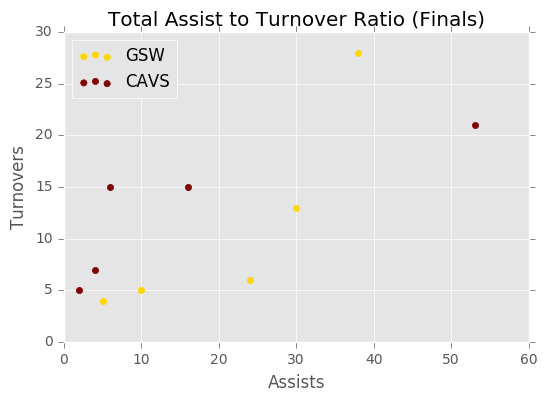

In [38]:
w = plt.scatter(Fgsw["AST"], Fgsw["TOV"], color='gold')
c = plt.scatter(Fcavs["AST"], Fcavs["TOV"], color='maroon')
axes = plt.gca()
axes.set_xlim([0,60])
plt.title("Total Assist to Turnover Ratio (Finals)")
plt.xlabel("Assists")
plt.ylabel("Turnovers")
plt.legend([w, c], ["GSW", "CAVS"], loc="upper left")

In the finals however, we see a slightly different story. Of the five starting players on the Warriors and the Cavaliers, it seem like the staring players on the Warriors generally have more assists and fewer turnovers than that of the Cavaliers. Both teams, however, have one player than commits a very high number of turnovers but also has a lot of assists. These findings benefit the Warriors since a higher number of assists means the Warriors were able to assist each other in scoring more than the Cavaliers were able to. More scoring means more points, and more points means your team wins. Additionally, keeping the the number of turnovers low means reducing the number of opportunities your opponent has to score.

### Scoring Ability: <font color='blue'>2-Point vs 3-Point Field Goals Made</font>

The following plots compare how many 2-point vs 3-point field goals were made by players on each team. A 2-point field goal occurs when a player shoots, dunks, or does a layup within the 3-point arc on the basketball court. A 3-point field goal occurs when a player makes a basket by shooting the ball from beyong the 3-point arc. Because 3-point shots are worth more than 2-point shots, teams that are able to make many 3-point shots efficiently tend to have an advantage since their opponents who can't make 3-point shots will have to make three 2-point shots to equal every two 3-point shots made.

Below we compare the 2-point and 3-point field goals made by players from the Warriors and the Cavaliers in the regular season and during the 2015 NBA finals. Similar to the previous plots, we only looked at the five starting players during the finals as they are the most influential during the playoff season.

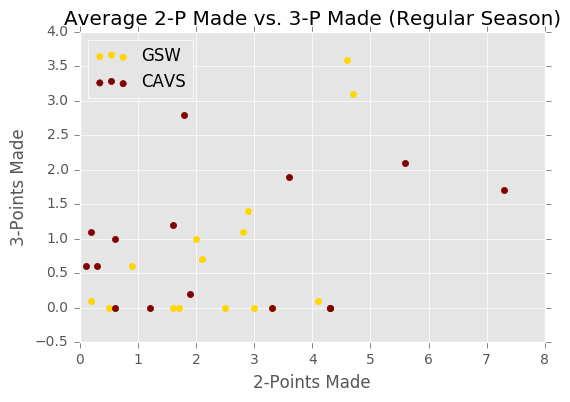

In [41]:
w = plt.scatter(Rgsw["2P"], Rgsw["3P"], color='gold')
c = plt.scatter(Rcavs["2P"], Rcavs["3P"], color='maroon')
axes = plt.gca()
axes.set_xlim([0,8])
plt.title("Average 2-P Made vs. 3-P Made (Regular Season)")
plt.xlabel("2-Points Made")
plt.ylabel("3-Points Made")
plt.legend([w, c], ["GSW", "CAVS"], loc="upper left")

It is not very clear from the plot which team has the advantage since in the regular season. Although the Warriors have players (Stephen Curry and Klay Thompson) who are very skilled and efficient at hitting 3-point field goals, The Cavaliers have some players that are very skilled and efficient at getting to the basket and making 2-point field goals (Lebron James and Kyrie Irving).

In [28]:
Fgsw["2P"] = Fgsw["FG"] - Fgsw["3P"]
Fcavs["2P"] = Fcavs["FG"] - Fcavs["3P"]

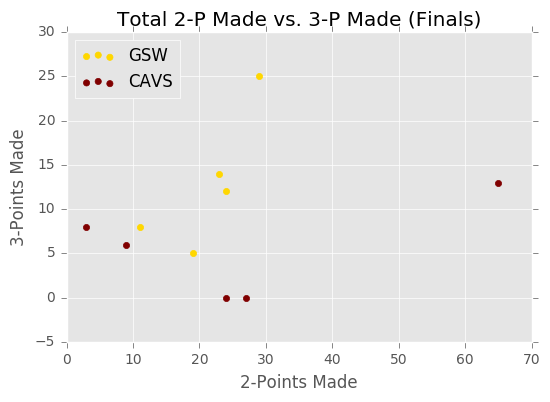

In [39]:
w = plt.scatter(Fgsw["2P"], Fgsw["3P"], color='gold')
c = plt.scatter(Fcavs["2P"], Fcavs["3P"], color='maroon')
axes = plt.gca()
axes.set_xlim([0,70])
plt.title("Total 2-P Made vs. 3-P Made (Finals)")
plt.xlabel("2-Points Made")
plt.ylabel("3-Points Made")
plt.legend([w, c], ["GSW", "CAVS"], loc="upper left")

From this plot it becomes more clear which team had the advantage during the NBA finals. Although the Cavaliers had one starting player that was phenomenal at making many 2-point field goals (Lebron James), the Warriors starting five were much better at making 3-point field goals while also making a roughly equal number of 2-point field-goals as the other four Cavaliers starters. These results suggest that the Warriors naturally had a scoring advantage since they were able to rack up more points from 3-point field goals than the Cavaliers were able to do with 2-point field goals.

### Shooting Efficiency: <font color='blue'>Field Goal Attempts vs Field Goals Made</font>

Anytime a player attempts to score a basket, whether they are performing a layup, dunk, or shooting the ball from anywhere on the court, they are attempting a field goal. If the player successfully scores a basket, then they make a field goal. Successful players and teams are able to score more and miss less, thus their field goals made are higher relative to how many field goal attempts they take.

Below we compare how the Warriors and Cavaliers compare in terms of field goal attempts and field goals made during the regular season and during the finals.

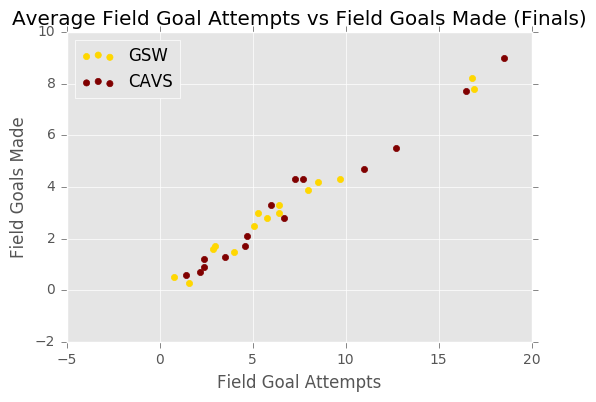

In [55]:
w = plt.scatter(Rgsw["FGA"], Rgsw["FG"], color='gold')
c = plt.scatter(Rcavs["FGA"], Rcavs["FG"], color='maroon')
plt.title("Average Field Goal Attempts vs Field Goals Made (Finals)")
plt.xlabel("Field Goal Attempts")
plt.ylabel("Field Goals Made")
plt.legend([w, c], ["GSW", "CAVS"], loc="upper left")

The plot shows a fairly linear trend, suggesting that during the regular season, players on both teams had similar field goal percentages (field goals made / field goal attempts). Therefore, it is not clear which team was better in terms of shooting efficiency during the regular season.

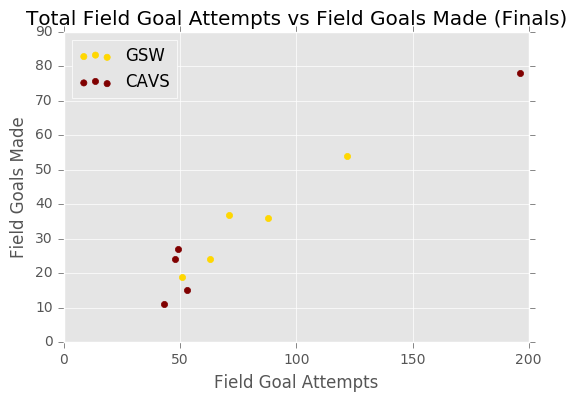

In [57]:
w = plt.scatter(Fgsw["FGA"], Fgsw["FG"], color='gold')
c = plt.scatter(Fcavs["FGA"], Fcavs["FG"], color='maroon')
axes = plt.gca()
axes.set_xlim([0,200])
plt.title("Total Field Goal Attempts vs Field Goals Made (Finals)")
plt.xlabel("Field Goal Attempts")
plt.ylabel("Field Goals Made")
plt.legend([w, c], ["GSW", "CAVS"], loc="upper left")

Shooting data from the finals tell a different story. Althouh the Cavaliers had one player who took nearly 200 shots and made nearly 80 of them (~ 40% field goals made), the Warriors starting five were able to not only take more field goal attempts, they also made more field goals as a group than the cavaliers. More field goals made means more points and more points means they win the game.

# V. Conclusion

Overall, we found that across each round of the playoffs and through the NBA finals, the Warriors were favored to win over each of their opponents by large margin. This can be explained by the fact that they have the talent and endurance to build large leads in the first or second quarter, and maintain that lead throughout the rest of the game. This is only possible with strong starting players who can start a game strong, followed by efficient bench players who can maintain the lead while the starting players rest, and finally starting players that are able to close a game strong. Furthermore, we found that in key playoff series (Conference Finals against the Houston Rockets, and NBA Finals against the Cleveland Cavaliers), the Warriors were able to win by larger average point differentials.

When comparing the Big 3 players from each team, we found that the Warriors' Stephen Curry, Klay Thompson, and Draymond Green were seen by draft scouts in the NBA to be less likely to succeed in the NBA and become superstars than the Cavaliers' Lebron James, Kyrie Irving, and Kevin Love. Despite this, the Warriors Big 3 were able to clinch the championship title. A factor that may account for this is that the Warriors were able to not only develop talent in their draft picks, they were also able to build better team chemistry between their Big 3, thus creating a more successful team.

Finally, we compared statistics from the regular season and from the finals. Although plotting data from the regular season did not tell us much, plotting data from the finals told us a lot about why the Warriors likely won the NBA Finals in 2015. The key reasons are as follows:
<li>Compared to the Cavaliers, the Warriors starting five were generally able to keep their assists high and their turnovers low. This means they were more efficient offensively and defensively.</li>
<li>The Warriors were able to make just about as many 2-point field goals as 4 of the Cavaliers' starting players while also making many more 3-pointers. This means they had better scoring abilities.</li>
<li>The Warriors were much more efficient with their shooting as evident by the fact that they were able to both take more shots and make more shots. This means they had better scoring efficiency.</li>

With all these factors combined, it is not surprising that 2015 was a very special year for the Warriors as they were able to clinch their first NBA Championship title in 40 years!